# Model Definition
 

Now it’s time to start modelling. So, this is where it really depends on your use case and data set how you want to proceed. For example, if you are in an unsupervised context you can choose between an auto-encoder, PCA or clustering. Or if you are in a supervised context you have choice between different state-of-the-art machine learning and deep learning algorithms. But here are some guidelines which are required to follow:

 

- Choose, justify and apply a **model performance indicator** (e.g. F1 score, true positive rate, within cluster sum of squared error, …) to assess your model and justify the choice of an algorithm

- Implement your algorithm in at least **one deep learning** and at least **one non-deep learning** algorithm, **compare and document model performance**

- Apply at least one **additional iteration in** the process model involving **at least the feature creation task** and record impact on model performance (e.g. data normalizing, PCA, …)

Depending on the algorithm class and data set size you might choose specific technologies / frameworks to solve your problem. Please document all your decisions in the ADD (Architectural Decisions Document).

Once you think you have achieved a descent model performance save the notebook according to the process model’s naming convention and proceed to the model training task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/Climate_day_train_feature.parquet

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [3]:
df = pd.read_parquet('Climate_day_train_feature.parquet')

In [4]:
df.head()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
0,1991-01-01,4.5,7.1,3.7,0,4.7,7.0,1010.8,4.8,82.0,1,0,0
1,1991-01-02,9.2,3.8,0.0,0,7.3,10.7,996.7,11.4,81.0,1,0,0
2,1991-01-03,5.3,9.2,0.0,0,7.3,9.6,1001.9,8.6,85.0,1,0,0
3,1991-01-04,6.2,0.4,4.1,0,6.3,7.9,1003.5,6.8,79.0,1,0,0
4,1991-01-05,7.7,2.9,1.1,0,5.3,7.1,1000.4,6.6,74.0,1,0,0


Let's see if normalisation works as it should do...

In [5]:
scaled_data = MinMaxScaler().fit_transform(np.array(df['Wind_avg']).reshape(-1,1))
scaled_data

array([[0.33070866],
       [0.7007874 ],
       [0.39370079],
       ...,
       [0.38582677],
       [0.48818898],
       [0.42519685]])

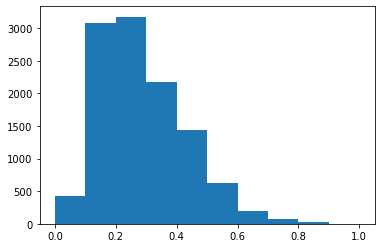

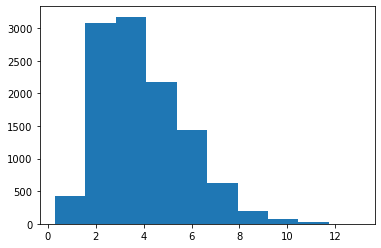

In [6]:
plt.hist(scaled_data)
plt.show()
plt.hist(df['Wind_avg'])
plt.show()

In [7]:
# Yes, it does work as expected

In [8]:
temp1 =np.array(df.iloc[:,1:12])
temp1

array([[ 4.5  ,  7.1  ,  3.7  , ..., 82.   ,  1.   ,  0.   ],
       [ 9.2  ,  3.8  ,  0.   , ..., 81.   ,  1.   ,  0.   ],
       [ 5.3  ,  9.2  ,  0.   , ..., 85.   ,  1.   ,  0.   ],
       ...,
       [ 5.2  ,  6.2  ,  0.183, ..., 93.67 ,  1.   ,  0.   ],
       [ 6.5  ,  0.1  ,  0.   , ..., 90.83 ,  1.   ,  0.   ],
       [ 5.7  ,  0.   ,  1.433, ..., 81.92 ,  1.   ,  0.   ]])

In [9]:
scaled_data_array = MinMaxScaler().fit_transform(temp1)
scaled_data_array

array([[0.33070866, 0.12369338, 0.23125   , ..., 0.75675676, 1.        ,
        0.        ],
       [0.7007874 , 0.06620209, 0.        , ..., 0.74324324, 1.        ,
        0.        ],
       [0.39370079, 0.16027875, 0.        , ..., 0.7972973 , 1.        ,
        0.        ],
       ...,
       [0.38582677, 0.10801394, 0.0114375 , ..., 0.91445946, 1.        ,
        0.        ],
       [0.48818898, 0.00174216, 0.        , ..., 0.87608108, 1.        ,
        0.        ],
       [0.42519685, 0.        , 0.0895625 , ..., 0.75567568, 1.        ,
        0.        ]])

In [10]:
column_headers = list(df.iloc[:,1:12].columns)
df_norm = pd.DataFrame(scaled_data_array, columns = column_headers)
df_norm['Date'] = df['Date']
df_norm = df_norm.reindex(columns = list(df.columns))
df_norm.head()
df_norm.tail()

,Date,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
11217,2021-12-27,0.440945,0.017422,0.079187,0.0,0.8750,0.339535,0.337937,0.460699,0.891892,1.0,0.0,NaN
11218,2021-12-28,0.433071,0.259582,0.006250,0.0,0.8875,0.409302,0.257610,0.508734,0.899730,1.0,0.0,NaN
11219,2021-12-29,0.385827,0.108014,0.011437,0.0,0.9750,0.451163,0.425169,0.530568,0.914459,1.0,0.0,NaN
11220,2021-12-30,0.488189,0.001742,0.000000,0.0,0.9500,0.586047,0.558484,0.615721,0.876081,1.0,0.0,NaN
11221,2021-12-31,0.425197,0.000000,0.089563,0.0,0.8625,0.511628,0.616826,0.609170,0.755676,1.0,0.0,NaN


In [11]:
# something is not right here with the hot encoded precepitation values. At least it seems like that to me
list(df.columns)

['Date',
 'Wind_avg',
 'Precepitation',
 'sunshine_hours',
 'snow_height',
 'Coverage_avg',
 'Vapour_p_avg',
 'Air_p_avg',
 'Temp_avg',
 'Rel_Humid_avg',
 'Rain',
 'Snow',
 'RainAndSnow']

In [12]:
df_norm.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,0.0
mean,0.289354,0.035926,0.273083,0.004205,0.65263,0.408011,0.564333,0.560564,0.667402,0.573962,0.024951,NaN
std,0.140101,0.073853,0.265221,0.036889,0.26270,0.180744,0.129194,0.148132,0.157974,0.494521,0.155983,NaN
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.181102,0.000000,0.025000,0.000000,0.50000,0.265116,0.487599,0.451965,0.567568,0.000000,0.000000,NaN
50%,0.267717,0.001742,0.200000,0.000000,0.71250,0.386047,0.569335,0.561135,0.689189,1.000000,0.000000,NaN
75%,0.377953,0.040070,0.462500,0.000000,0.87500,0.539535,0.648253,0.672489,0.783784,1.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [13]:
df.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,3.974791,2.062146,4.369322,0.113527,5.221039,10.372233,1011.145100,11.073846,75.387749,0.573962,0.024951,0.056407
std,1.779277,4.239138,4.243528,0.995998,2.101599,3.885992,9.167585,6.784468,11.690102,0.494521,0.155983,0.230716
min,0.300000,0.000000,0.000000,0.000000,0.000000,1.600000,971.100000,-14.600000,26.000000,0.000000,0.000000,0.000000
25%,2.600000,0.000000,0.400000,0.000000,4.000000,7.300000,1005.700000,6.100000,68.000000,0.000000,0.000000,0.000000
50%,3.700000,0.100000,3.200000,0.000000,5.700000,9.900000,1011.500000,11.100000,77.000000,1.000000,0.000000,0.000000
75%,5.100000,2.300000,7.400000,0.000000,7.000000,13.200000,1017.100000,16.200000,84.000000,1.000000,0.000000,0.000000
max,13.000000,57.400000,16.000000,27.000000,8.000000,23.100000,1042.060000,31.200000,100.000000,1.000000,1.000000,1.000000


In [14]:
df_norm.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height       float64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain              float64
Snow              float64
RainAndSnow       float64
dtype: object

In [15]:
df.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height         int64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain                uint8
Snow                uint8
RainAndSnow         uint8
dtype: object

In [16]:
# I got no idea what's wrong woth the last column, but I will simmply replace the values within the hot-encoded columns by the original values

In [17]:
df_norm['RainAndSnow'] = df['RainAndSnow']
df_norm['Rain'] = df['Rain']
df_norm['Snow'] = df['Snow']

In [27]:
df_norm.describe()

,Wind_avg,Precepitation,sunshine_hours,snow_height,Coverage_avg,Vapour_p_avg,Air_p_avg,Temp_avg,Rel_Humid_avg,Rain,Snow,RainAndSnow
count,11222.000000,11222.000000,11222.000000,11222.000000,11222.00000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000,11222.000000
mean,0.289354,0.035926,0.273083,0.004205,0.65263,0.408011,0.564333,0.560564,0.667402,0.573962,0.024951,0.056407
std,0.140101,0.073853,0.265221,0.036889,0.26270,0.180744,0.129194,0.148132,0.157974,0.494521,0.155983,0.230716
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181102,0.000000,0.025000,0.000000,0.50000,0.265116,0.487599,0.451965,0.567568,0.000000,0.000000,0.000000
50%,0.267717,0.001742,0.200000,0.000000,0.71250,0.386047,0.569335,0.561135,0.689189,1.000000,0.000000,0.000000
75%,0.377953,0.040070,0.462500,0.000000,0.87500,0.539535,0.648253,0.672489,0.783784,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_norm.dtypes

Date               object
Wind_avg          float64
Precepitation     float64
sunshine_hours    float64
snow_height       float64
Coverage_avg      float64
Vapour_p_avg      float64
Air_p_avg         float64
Temp_avg          float64
Rel_Humid_avg     float64
Rain                uint8
Snow                uint8
RainAndSnow         uint8
dtype: object

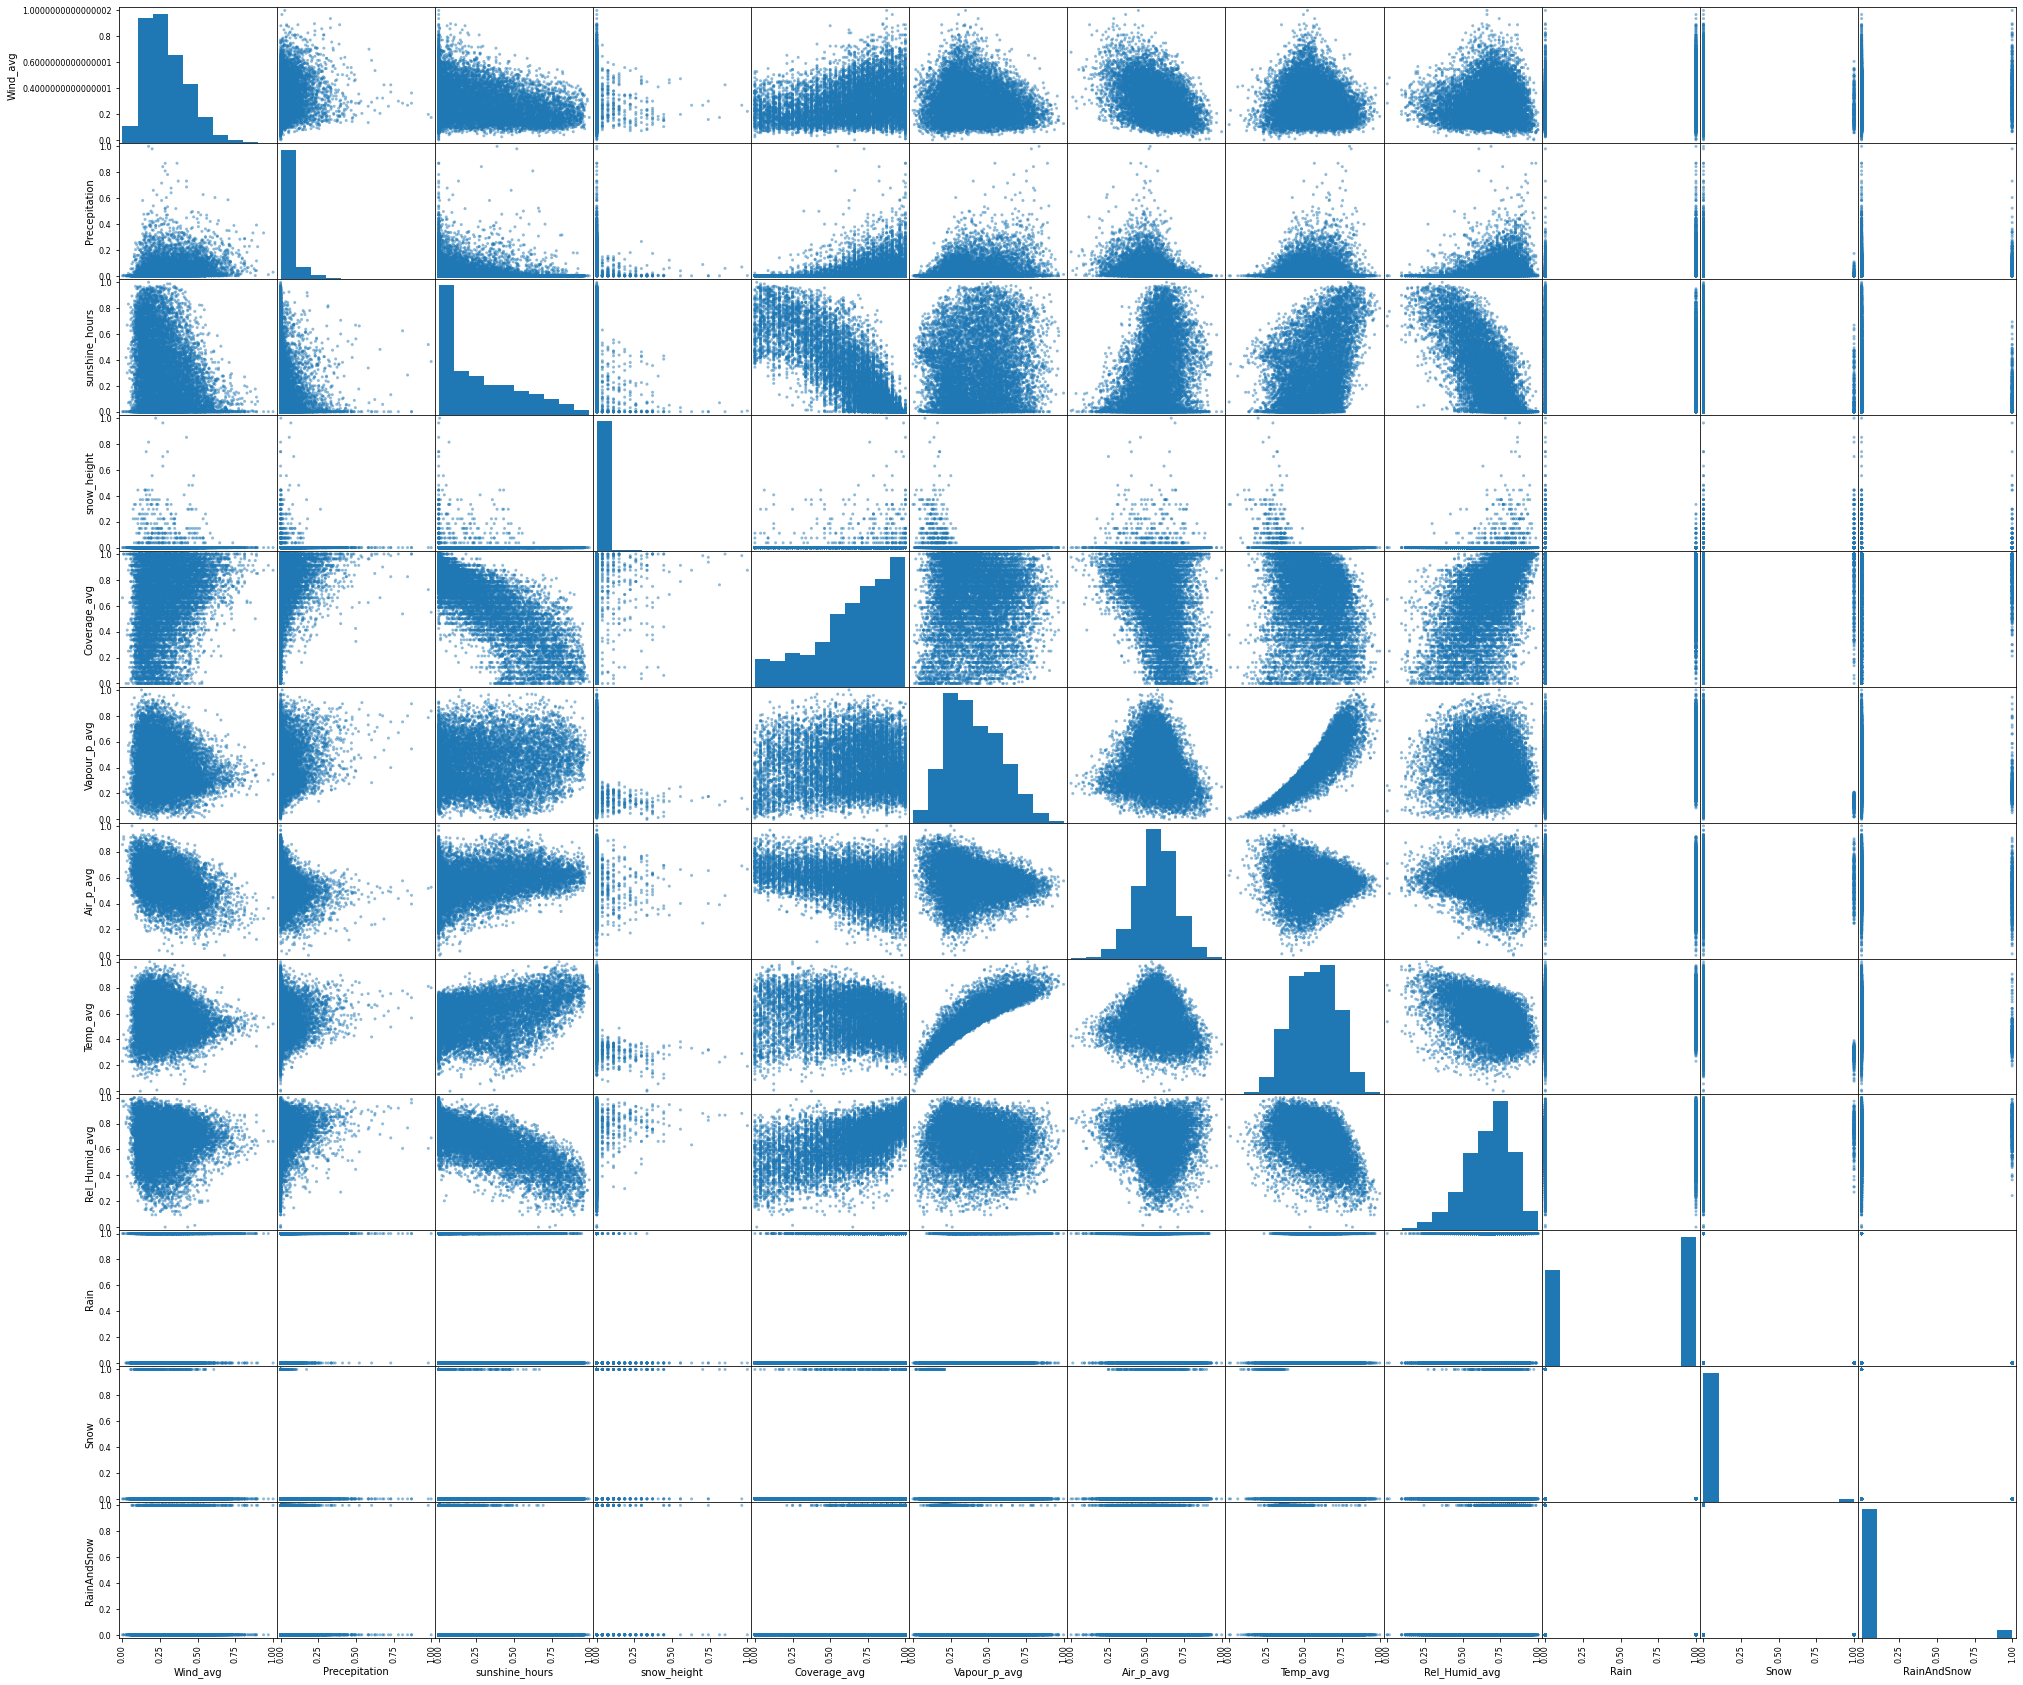

In [30]:
#let's take a renewd look at the scatter matrix:
pd.plotting.scatter_matrix(df_norm, figsize = (34,30))
plt.show()

In [31]:
# looks pretty much identical to the not normalised version. So I guess this has been done correctly

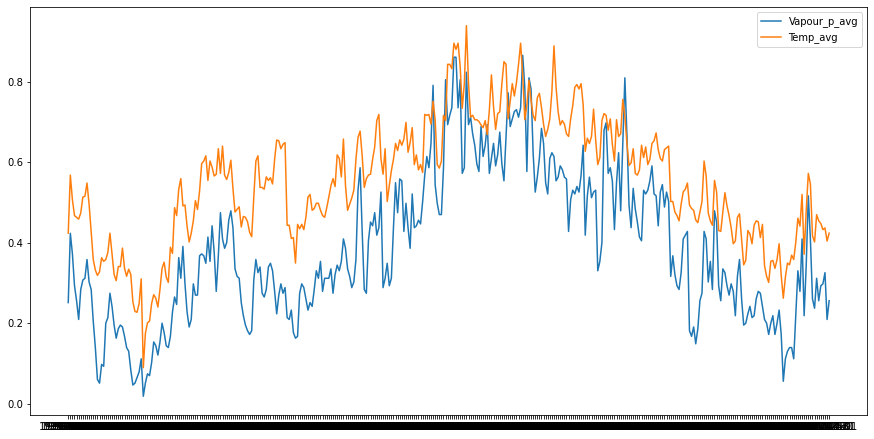

In [18]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

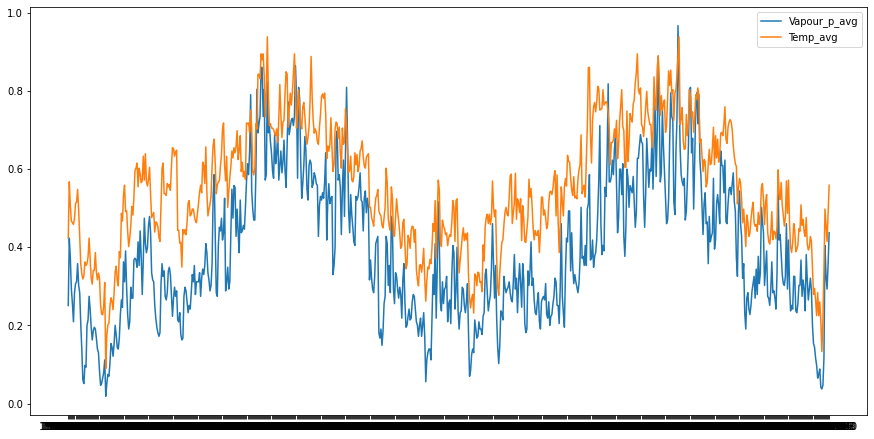

In [19]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:730, 'Date'],df_norm.loc[0:730, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:730, 'Date'],df_norm.loc[0:730, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()